# **This notebook is all about using hugging face framework. how to use transformers and pipeline to get the task done by using pretrained model provided by hugging face.**

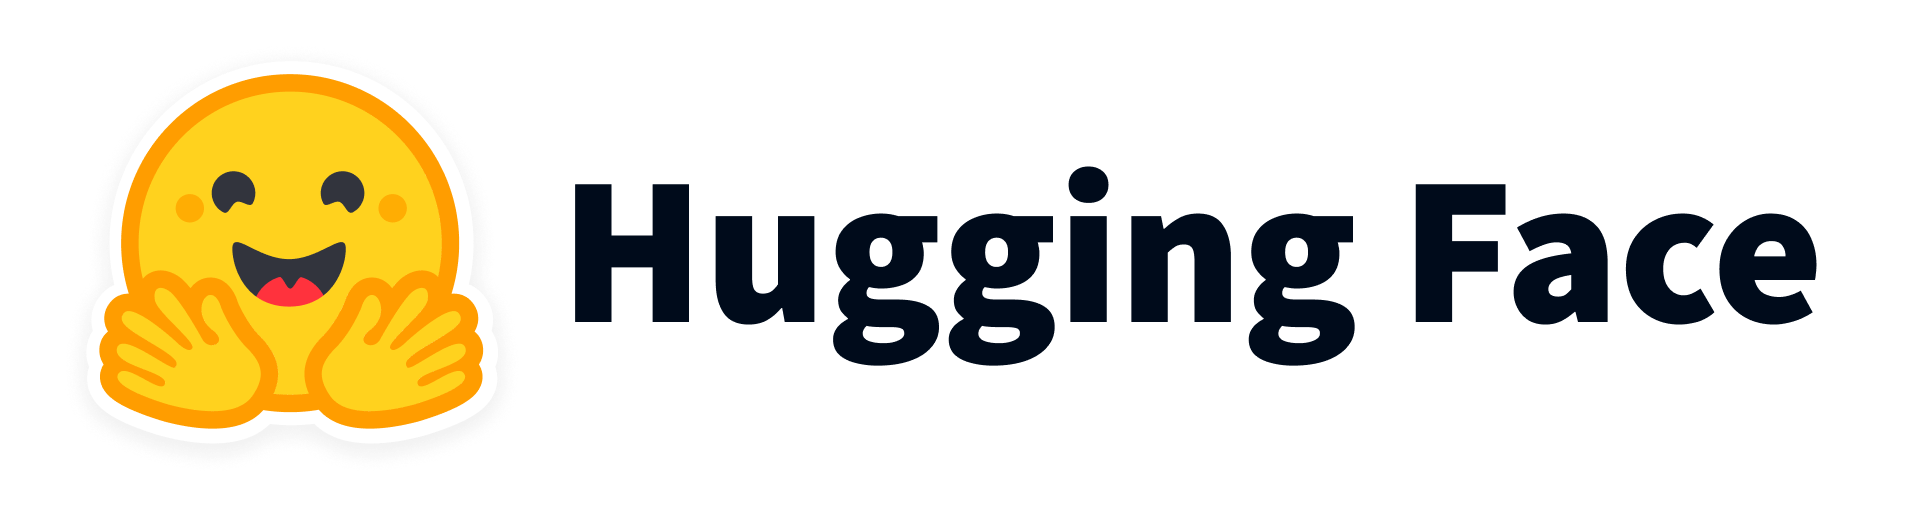

# **importing pandas to deal with dataframes and manipulations**

In [1]:
import pandas as pd

**# getting our dataset from google drive shareable link**




In [2]:
!gdown --id 13U7rdoeeqpXGlzp0BtseajWHBnCpIsZh


/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13U7rdoeeqpXGlzp0BtseajWHBnCpIsZh
To: /content/bbc_news.csv
100% 5.06M/5.06M [00:00<00:00, 57.6MB/s]


In [3]:
!unzip /content/<filename>.zip -d /content/<directory>


/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `unzip /content/<filename>.zip -d /content/<directory>'


In [4]:
import os

file_name = 'bbc_news.csv' # Replace with the name of the downloaded file
file_size = os.path.getsize(file_name)

In [5]:
news = pd.read_csv('bbc_news.csv')

In [6]:
news.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


Link to dataset
https://www.kaggle.com/datasets/gpreda/bbc-news

# **creating a duplicate to do our task without disturbing the original dataset**

In [7]:
df = news
df.shape

(15244, 5)

In [8]:
columns = ["pubDate","guid","link"]
df= df.drop(columns,axis =1)

In [9]:
df.head()

,title,description
0,Ukraine: Angry Zelensky vows to punish Russian...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,Consumers are feeling the impact of higher ene...


# Importing nltk to deal with stopwords and converting the case to lower, pipeline can automatically do this but this just to show the method, it doesn't affect the outcome

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

def preprocess(text):
    text = text.lower() # Convert text to lowercase
    text = ' '.join(word for word in text.split() if word not in stopwords) # Remove stop words
    text = text.replace('[^a-zA-Z0-9\s]', '') # Remove punctuation
    return text

df['clean_title'] = df['title'].apply(preprocess)
df['clean_description'] = df['description'].apply(preprocess)
columns = ["description","title"]
df = df.drop(columns,axis =1)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
df.head()

,clean_title,clean_description
0,ukraine: angry zelensky vows punish russian at...,ukrainian president says country forgive forge...
1,war ukraine: taking cover town attack,"jeremy bowen frontline irpin, residents came r..."
2,ukraine war 'catastrophic global food',one world's biggest fertiliser firms says conf...
3,manchester arena bombing: saffie roussos's par...,parents manchester arena bombing's youngest vi...
4,ukraine conflict: oil price soars highest leve...,consumers feeling impact higher energy costs f...


# **I combined both the title and description in order to give model sufficient data to make the decision**

In [12]:
df['combine'] = df['clean_title'] + df["clean_description"]
df = df.drop('clean_title', axis = 1)
df = df.drop('clean_description', axis =1)

In [13]:
df.head()

,combine
0,ukraine: angry zelensky vows punish russian at...
1,war ukraine: taking cover town attackjeremy bo...
2,ukraine war 'catastrophic global food'one worl...
3,manchester arena bombing: saffie roussos's par...
4,ukraine conflict: oil price soars highest leve...


In [14]:
df.isnull().sum()

combine    0
dtype: int64

# **Installing transformers library to get the models from hugging face framework**

In [15]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 22.2 MB/s eta 0:00:00


# **we can use the model with autokenizer and automodel but we used pipeline**

In [16]:
#from transformers import AutoTokenizer, AutoModel
#model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
#tokenizer = AutoTokenizer.from_pretrained(model_name)
#model = AutoModel.from_pretrained(model_name)

Some weights of the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment were not used when initializing BertModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# **importing pipeline from transformers library**
It's easy to implement and simple

In [17]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis")
res= classifier('interior is good but service was bad')
print(res)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'NEGATIVE', 'score': 0.9964145421981812}]


#**Making a function to pass the input into the model and storing the outputs generated by the model in df["results"]** 

In [18]:
def analyze_sentiment_batch(texts):
    results = classifier(texts, truncation=True)
    return [(r['label'], r['score']) for r in results]

# Split the input texts into batches of size 32 or more (adjust as needed)
batch_size = 102
text_batches = [df['combine'][i:i+batch_size].tolist() for i in range(0, len(df), batch_size)]

# Apply the function to each batch of texts and store the results in a new column
df['results'] = [result for batch in text_batches for result in analyze_sentiment_batch(batch)]



In [19]:
df.head(15)

,combine,results
0,ukraine: angry zelensky vows punish russian at...,"(NEGATIVE, 0.992180585861206)"
1,war ukraine: taking cover town attackjeremy bo...,"(NEGATIVE, 0.9850346446037292)"
2,ukraine war 'catastrophic global food'one worl...,"(NEGATIVE, 0.9923680424690247)"
3,manchester arena bombing: saffie roussos's par...,"(NEGATIVE, 0.9917146563529968)"
4,ukraine conflict: oil price soars highest leve...,"(NEGATIVE, 0.9181494116783142)"
5,ukraine war: pm hold talks world leaders sanct...,"(NEGATIVE, 0.8106705546379089)"
6,ukraine war: uk grants 50 ukrainian refugee vi...,"(NEGATIVE, 0.980233371257782)"
7,tiktok limits services netflix pulls russiatik...,"(NEGATIVE, 0.9995500445365906)"
8,"covid: fourth jab scotland's vulnerable, testi...","(NEGATIVE, 0.9059380888938904)"
9,protests across russia see thousands detainedp...,"(NEGATIVE, 0.985632061958313)"


#**copying data from df to our original dataset**

In [20]:
news["results"]= df["results"]

# **creating two columns for results one for sentiment and other for score**

In [21]:
news[['sentiment', 'score']] = pd.DataFrame(news['results'].tolist(), index=news.index)
news = news.drop("results",axis = 1)

In [22]:
news.head()

,title,pubDate,guid,link,description,sentiment,score
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...,NEGATIVE,0.992181
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as...",NEGATIVE,0.985035
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...,NEGATIVE,0.992368
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...,NEGATIVE,0.991715
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...,NEGATIVE,0.918149


# **text generation**

# **I have used gpt2 model for text generation**

In [23]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')



# **testing with sample input, seting seed = 42 means the text generated is reproducible**

In [24]:
set_seed(42)
generator("Hello, I'm a language model,", max_length=300, num_return_sequences=1)

/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1201: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Hello, I\'m a language model, I\'m a problem solver in languages."\n\nAt the same time, she said we can understand an idea like "reactive programming," because programming is what you create. The problem is how do you write code as a language. It\'s just human nature, so we can talk about code as a language with the same basic concepts as Haskell, so we can give an example. If we say, "We need to solve this problem from the perspective of Haskell," we have an idea of how to do it. If we say, "We\'re looking at the situation like a problem involving pure numbers and vectors," we have an idea of the problem. There are a lot of things that can change the way you get what you\'re solving. When you\'re thinking about a problem, you get to see your problem as a sort of abstraction of your problems, and then you get to understand the problem at the exact level that it\'s being solved.\n\nIn the case of our problem at the macro level, that\'s my problem, we want to think a

In [25]:
tg = news
tg.columns

Index(['title', 'pubDate', 'guid', 'link', 'description', 'sentiment',
       'score'],
      dtype='object')

# **creating a new dataset same as news and dropping all the columns which are not required for text generation. Used description as input for text generation model .**

In [26]:
columns = ['title', 'pubDate', 'guid', 'link','sentiment','score']
tg = tg.drop(columns,axis = 1)


In [27]:
tg.head()

,description
0,The Ukrainian president says the country will ...
1,"Jeremy Bowen was on the frontline in Irpin, as..."
2,One of the world's biggest fertiliser firms sa...
3,The parents of the Manchester Arena bombing's ...
4,Consumers are feeling the impact of higher ene...


# **As text generation is taking too much time so I've dropped 15230 rows to reduce the execution time, It can be done for all rows but will take time.**

In [28]:
tg.drop(range(15230), inplace=True)


# **Used for loop for iteration each row and passing into the model pipeline and storing the output in a different column named as tg['generated_text']**

In [35]:
generated_text = []
for index, row in pd.DataFrame(tg).iterrows():
    text_input = row['description']
    generated_sequence = generator(text_input, max_length=150, num_return_sequences=1)[0]['generated_text']
    generated_text.append(generated_sequence)

# Add generated text to DataFrame
tg['generated_text'] = generated_text

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

## **For showing that the model is working perfectly, description in row 15231 is hown below which has approx 35+ words**

In [34]:
tg['description'].loc[15231]



'Former Sinn Féin president says he only recently realised how difficult it was for the UUP leader.'

## **for the same row, our model has produced text with 100+ words.**

In [37]:
tg['generated_text'].loc[15231]


'Former Sinn Féin president says he only recently realised how difficult it was for the UUP leader.\n\n"I went to the back of the room and the man sat at his desk and said that if there was a single thing for me to have to be on the front burner of when he took questions of me, I don\'t think he\'d think on the eve of the general election." he continued to explain. "A lot of you think that was because he was an anti-Labour nationalist. It was a good opportunity to discuss how, even though we could have a very different approach, we still still had our differences."\n\nThe Sinn Féin leader has said in the past he does not regret it if "the'

# **combining it with our original dataset news**

In [38]:
news['text_generation'] =  tg['generated_text']

# **End results**

In [40]:
news.iloc[15231:15236]

,title,pubDate,guid,link,description,sentiment,score,text_generation
15231,Good Friday Agreement: Gerry Adams praises Dav...,"Tue, 28 Mar 2023 05:20:50 GMT",https://www.bbc.co.uk/news/uk-northern-ireland...,https://www.bbc.co.uk/news/uk-northern-ireland...,Former Sinn Féin president says he only recent...,POSITIVE,0.993360,Former Sinn Féin president says he only recent...
15232,Paternoster lift at Essex university is TikTok...,"Tue, 28 Mar 2023 05:13:39 GMT",https://www.bbc.co.uk/news/uk-england-essex-65...,https://www.bbc.co.uk/news/uk-england-essex-65...,Videos demonstrating the 1960s lift at the Uni...,POSITIVE,0.994661,Videos demonstrating the 1960s lift at the Uni...
15233,The tech helping driverless cars see round cor...,"Mon, 27 Mar 2023 23:13:08 GMT",https://www.bbc.co.uk/news/business-65036895,https://www.bbc.co.uk/news/business-65036895?a...,A trial in London used existing street cameras...,NEGATIVE,0.939284,A trial in London used existing street cameras...
15234,Coronation street party deadline is looming,"Tue, 28 Mar 2023 03:12:39 GMT",https://www.bbc.co.uk/news/uk-65092586,https://www.bbc.co.uk/news/uk-65092586?at_medi...,If you want to close your street over the bank...,NEGATIVE,0.993097,If you want to close your street over the bank...
15235,Scotland 2-0 Spain: Steve Clarke's classy and ...,"Tue, 28 Mar 2023 22:06:24 GMT",https://www.bbc.co.uk/sport/football/65107499,https://www.bbc.co.uk/sport/football/65107499?...,Scotland delivered a performance for the ages ...,POSITIVE,0.998982,Scotland delivered a performance for the ages ...


# **Do share your reviews**
https://docs.google.com/forms/d/e/1FAIpQLSepWp917tHUMTwH0g29CQY2FmjQNgeXg0tUNoLdKFr6MW0HLg/viewform?usp=sf_link